In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions.normal import Normal
import numpy as np
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import sys

import layers as layers
import util as util
import networks as networks

torch.set_default_dtype(torch.float64)

In [2]:
sys.path.insert(0, '../exp/')
import util as util_data

In [3]:
importlib.reload(layers)
importlib.reload(util)
importlib.reload(networks)

<module 'networks' from '/Users/beaucoker/Documents/git/VS-BNN/code/horseshoe/networks.py'>

### SIN dataset

In [4]:
n_obs = 100
dim_in = 2
Z, X, Y, sig2 = util_data.load_data('sin', n_obs=n_obs, dim_in=dim_in, sig2=.01, seed=0)


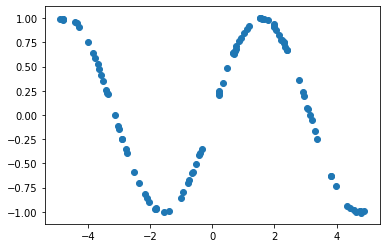

In [5]:
plt.scatter(Z[:,0],Y)

In [6]:
torch.manual_seed(2)
model = networks.RffHs(dim_in, 1, dim_hidden=50, sig2_inv=1/sig2)

In [7]:
torch.manual_seed(2)
optimizer = torch.optim.Adam(model.parameters(), lr=.001)
model.reinit_parameters(torch.from_numpy(Z),torch.from_numpy(Y),n_reinit=10) 

In [8]:
for name, p in model.named_parameters():
    print(name, p.detach())

layer_in.lognu_mu tensor([-0.0092])
layer_in.lognu_logsig2 tensor([-9.0087])
layer_in.logeta_mu tensor([-0.0151, -0.0158])
layer_in.logeta_logsig2 tensor([-8.9918, -9.0054])


Epoch[1/1000], kl: 14.825961, likelihood: 120.415028, elbo: 102.993249
Epoch[2/1000], kl: 14.856396, likelihood: 88.136219, elbo: 95.487686
Epoch[3/1000], kl: 14.884110, likelihood: 94.772057, elbo: 87.462088
Epoch[4/1000], kl: 14.917044, likelihood: 114.896492, elbo: 88.855471
Epoch[5/1000], kl: 14.954074, likelihood: 104.476651, elbo: 90.916922
Epoch[6/1000], kl: 14.988046, likelihood: 102.486782, elbo: 87.776966
Epoch[7/1000], kl: 15.021679, likelihood: 113.623582, elbo: 97.914736
Epoch[8/1000], kl: 15.060728, likelihood: 102.490801, elbo: 86.359617
Epoch[9/1000], kl: 15.093743, likelihood: 101.973120, elbo: 94.306935
Epoch[10/1000], kl: 15.132037, likelihood: 100.186136, elbo: 95.829289
Epoch[11/1000], kl: 15.168857, likelihood: 99.835181, elbo: 92.018013
Epoch[12/1000], kl: 15.210776, likelihood: 117.302428, elbo: 102.793752
Epoch[13/1000], kl: 15.250104, likelihood: 113.400990, elbo: 97.668693
Epoch[14/1000], kl: 15.292186, likelihood: 93.473165, elbo: 91.972477
Epoch[15/1000], k

Epoch[115/1000], kl: 17.078198, likelihood: 131.658272, elbo: 114.389554
Epoch[116/1000], kl: 17.074396, likelihood: 133.409246, elbo: 116.722073
Epoch[117/1000], kl: 17.066015, likelihood: 133.059977, elbo: 116.290666
Epoch[118/1000], kl: 17.061807, likelihood: 128.171674, elbo: 112.035384
Epoch[119/1000], kl: 17.033402, likelihood: 133.013580, elbo: 116.462303
Epoch[120/1000], kl: 17.010913, likelihood: 134.889635, elbo: 117.671156
Epoch[121/1000], kl: 16.979982, likelihood: 129.992601, elbo: 113.607869
Epoch[122/1000], kl: 16.958687, likelihood: 135.100167, elbo: 118.170208
Epoch[123/1000], kl: 16.919939, likelihood: 125.833748, elbo: 111.148186
Epoch[124/1000], kl: 16.878430, likelihood: 126.776553, elbo: 111.022921
Epoch[125/1000], kl: 16.895520, likelihood: 134.699950, elbo: 118.162755
Epoch[126/1000], kl: 16.885493, likelihood: 132.803362, elbo: 115.540282
Epoch[127/1000], kl: 16.857800, likelihood: 129.611527, elbo: 114.122015
Epoch[128/1000], kl: 16.866366, likelihood: 134.120

Epoch[228/1000], kl: 15.664077, likelihood: 132.572097, elbo: 117.939336
Epoch[229/1000], kl: 15.638779, likelihood: 134.341213, elbo: 118.694629
Epoch[230/1000], kl: 15.638739, likelihood: 132.533679, elbo: 116.219536
Epoch[231/1000], kl: 15.634541, likelihood: 125.287610, elbo: 109.144997
Epoch[232/1000], kl: 15.608089, likelihood: 135.375100, elbo: 119.725128
Epoch[233/1000], kl: 15.592472, likelihood: 135.882561, elbo: 120.020795
Epoch[234/1000], kl: 15.576728, likelihood: 129.309181, elbo: 115.774781
Epoch[235/1000], kl: 15.560752, likelihood: 132.686147, elbo: 116.158272
Epoch[236/1000], kl: 15.575111, likelihood: 131.991764, elbo: 116.324915
Epoch[237/1000], kl: 15.551061, likelihood: 129.425515, elbo: 118.425196
Epoch[238/1000], kl: 15.523443, likelihood: 134.583820, elbo: 119.189547
Epoch[239/1000], kl: 15.501157, likelihood: 132.807042, elbo: 116.108929
Epoch[240/1000], kl: 15.470929, likelihood: 134.522933, elbo: 116.854052
Epoch[241/1000], kl: 15.467870, likelihood: 134.981

Epoch[341/1000], kl: 15.056470, likelihood: 130.779115, elbo: 119.120464
Epoch[342/1000], kl: 15.031277, likelihood: 132.073194, elbo: 116.900875
Epoch[343/1000], kl: 15.027970, likelihood: 132.642627, elbo: 117.210692
Epoch[344/1000], kl: 15.058536, likelihood: 131.411199, elbo: 119.106891
Epoch[345/1000], kl: 15.038876, likelihood: 132.617790, elbo: 118.659076
Epoch[346/1000], kl: 15.009847, likelihood: 133.246794, elbo: 119.244464
Epoch[347/1000], kl: 15.054995, likelihood: 129.945355, elbo: 111.768293
Epoch[348/1000], kl: 15.029027, likelihood: 130.896716, elbo: 113.910004
Epoch[349/1000], kl: 15.011021, likelihood: 132.600502, elbo: 119.292993
Epoch[350/1000], kl: 15.003111, likelihood: 133.213582, elbo: 117.684195
Epoch[351/1000], kl: 14.998140, likelihood: 134.962342, elbo: 117.982052
Epoch[352/1000], kl: 14.984385, likelihood: 127.867984, elbo: 106.857335
Epoch[353/1000], kl: 14.970907, likelihood: 134.510031, elbo: 117.527609
Epoch[354/1000], kl: 14.948459, likelihood: 126.354

Epoch[454/1000], kl: 14.598196, likelihood: 131.945368, elbo: 113.874763
Epoch[455/1000], kl: 14.594641, likelihood: 132.481786, elbo: 118.008395
Epoch[456/1000], kl: 14.602001, likelihood: 134.300163, elbo: 119.351427
Epoch[457/1000], kl: 14.595271, likelihood: 132.339282, elbo: 114.857017
Epoch[458/1000], kl: 14.601141, likelihood: 134.476761, elbo: 119.212711
Epoch[459/1000], kl: 14.617815, likelihood: 136.900736, elbo: 119.742398
Epoch[460/1000], kl: 14.602004, likelihood: 135.002172, elbo: 119.857877
Epoch[461/1000], kl: 14.600422, likelihood: 130.511226, elbo: 116.815907
Epoch[462/1000], kl: 14.607395, likelihood: 128.448337, elbo: 119.985323
Epoch[463/1000], kl: 14.590431, likelihood: 134.138396, elbo: 115.575206
Epoch[464/1000], kl: 14.559437, likelihood: 131.362822, elbo: 115.801583
Epoch[465/1000], kl: 14.552815, likelihood: 133.918741, elbo: 116.319628
Epoch[466/1000], kl: 14.540333, likelihood: 130.392182, elbo: 119.197691
Epoch[467/1000], kl: 14.528201, likelihood: 120.493

Epoch[567/1000], kl: 14.440258, likelihood: 133.413511, elbo: 119.360424
Epoch[568/1000], kl: 14.434228, likelihood: 121.689534, elbo: 110.283385
Epoch[569/1000], kl: 14.437600, likelihood: 129.373289, elbo: 117.891500
Epoch[570/1000], kl: 14.434131, likelihood: 127.731441, elbo: 118.685032
Epoch[571/1000], kl: 14.413758, likelihood: 131.375398, elbo: 112.935143
Epoch[572/1000], kl: 14.421037, likelihood: 130.072912, elbo: 110.478077
Epoch[573/1000], kl: 14.401084, likelihood: 128.486275, elbo: 121.304667
Epoch[574/1000], kl: 14.379156, likelihood: 128.785448, elbo: 112.141234
Epoch[575/1000], kl: 14.357198, likelihood: 129.373121, elbo: 118.073288
Epoch[576/1000], kl: 14.320993, likelihood: 131.429828, elbo: 116.641277
Epoch[577/1000], kl: 14.371245, likelihood: 131.612997, elbo: 118.284479
Epoch[578/1000], kl: 14.383099, likelihood: 128.502414, elbo: 108.985922
Epoch[579/1000], kl: 14.379881, likelihood: 131.401154, elbo: 112.037405
Epoch[580/1000], kl: 14.371143, likelihood: 128.379

Epoch[680/1000], kl: 14.372943, likelihood: 133.236668, elbo: 116.435180
Epoch[681/1000], kl: 14.372325, likelihood: 127.007186, elbo: 113.815365
Epoch[682/1000], kl: 14.355427, likelihood: 133.883709, elbo: 118.388432
Epoch[683/1000], kl: 14.366539, likelihood: 134.346544, elbo: 120.277380
Epoch[684/1000], kl: 14.345686, likelihood: 134.438329, elbo: 119.046971
Epoch[685/1000], kl: 14.343010, likelihood: 106.948986, elbo: 106.270254
Epoch[686/1000], kl: 14.331650, likelihood: 130.223067, elbo: 117.408574
Epoch[687/1000], kl: 14.336345, likelihood: 133.155159, elbo: 119.705378
Epoch[688/1000], kl: 14.362055, likelihood: 135.113331, elbo: 120.050737
Epoch[689/1000], kl: 14.352597, likelihood: 130.408357, elbo: 115.608016
Epoch[690/1000], kl: 14.354831, likelihood: 134.153866, elbo: 120.142610
Epoch[691/1000], kl: 14.357523, likelihood: 133.954149, elbo: 119.304406
Epoch[692/1000], kl: 14.360318, likelihood: 130.252611, elbo: 119.347083
Epoch[693/1000], kl: 14.332327, likelihood: 129.475

Epoch[793/1000], kl: 14.283071, likelihood: 132.831310, elbo: 118.497159
Epoch[794/1000], kl: 14.280037, likelihood: 133.622989, elbo: 119.885183
Epoch[795/1000], kl: 14.275574, likelihood: 135.258375, elbo: 121.633762
Epoch[796/1000], kl: 14.274343, likelihood: 130.496986, elbo: 117.435269
Epoch[797/1000], kl: 14.316138, likelihood: 128.807452, elbo: 121.539698
Epoch[798/1000], kl: 14.299172, likelihood: 136.721317, elbo: 115.259522
Epoch[799/1000], kl: 14.276627, likelihood: 135.873884, elbo: 121.084359
Epoch[800/1000], kl: 14.273495, likelihood: 134.672809, elbo: 121.048628
Epoch[801/1000], kl: 14.289932, likelihood: 136.741922, elbo: 121.181625
Epoch[802/1000], kl: 14.289337, likelihood: 130.795501, elbo: 104.067225
Epoch[803/1000], kl: 14.314415, likelihood: 133.708785, elbo: 120.057677
Epoch[804/1000], kl: 14.312724, likelihood: 134.956415, elbo: 120.655652
Epoch[805/1000], kl: 14.318512, likelihood: 136.796758, elbo: 122.853376
Epoch[806/1000], kl: 14.313345, likelihood: 132.426

Epoch[906/1000], kl: 14.366020, likelihood: 118.561797, elbo: 113.928260
Epoch[907/1000], kl: 14.347143, likelihood: 134.454553, elbo: 115.940549
Epoch[908/1000], kl: 14.346735, likelihood: 136.089690, elbo: 121.958520
Epoch[909/1000], kl: 14.338566, likelihood: 136.048422, elbo: 121.214630
Epoch[910/1000], kl: 14.346802, likelihood: 132.882093, elbo: 113.441687
Epoch[911/1000], kl: 14.332449, likelihood: 134.036342, elbo: 122.186827
Epoch[912/1000], kl: 14.330461, likelihood: 131.996023, elbo: 121.383927
Epoch[913/1000], kl: 14.313341, likelihood: 127.683987, elbo: 110.910750
Epoch[914/1000], kl: 14.340370, likelihood: 136.147310, elbo: 120.952082
Epoch[915/1000], kl: 14.322076, likelihood: 132.182357, elbo: 115.108783
Epoch[916/1000], kl: 14.319716, likelihood: 127.882096, elbo: 119.624384
Epoch[917/1000], kl: 14.289520, likelihood: 135.685629, elbo: 117.914789
Epoch[918/1000], kl: 14.331851, likelihood: 109.135667, elbo: 114.887733
Epoch[919/1000], kl: 14.332527, likelihood: 122.199

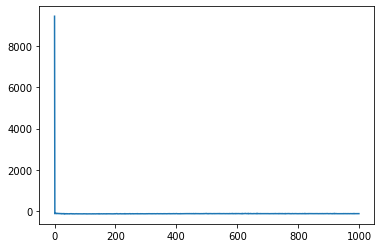

In [9]:
elbo = -networks.train(model, optimizer, torch.from_numpy(Z), torch.from_numpy(Y), n_epochs=1000, n_rep_opt=100, print_freq=1)
plt.plot(-elbo)

In [10]:
def plot_slice(model, x, y, dim=0, x_plot=None, x_plot_slice=0.0, n_samp=500, ax=None):
    with torch.no_grad():
    
        if ax is None:
            fig, ax = plt.subplots()
        dim_in = model.dim_in

        if x_plot is None:
            x_plot = torch.linspace(x.min(),x.max(),100)
            
        if type(x) is not np.ndarray:
            x = x.numpy()
            
        if type(y) is not np.ndarray:
            y = y.numpy()

        xx = x_plot_slice*torch.ones(x_plot.shape[0], dim_in)
        xx[:,dim] = x_plot.reshape(-1)

        f_pred_plot = model(xx, sample_input_layer=False, weights_type='mean').numpy() # posterior mean

        ax.scatter(x[:,dim], y) # training data
        ax.plot(xx[:,dim], f_pred_plot) # posterior mean

        # uncertainty
        f_samp_plot = np.zeros((n_samp, x_plot.shape[0]))
        for i in range(n_samp):
            f_samp_plot[i,:] = model(xx, sample_input_layer=True, weights_type='sample').numpy().reshape(-1)

        for q in [.025, .05, .1]:
            ci = np.quantile(f_samp_plot, [q, 1-q], axis=0)
            ax.fill_between(xx[:,0].reshape(-1), ci[0,:], ci[1,:], alpha=.1, color='blue')

            
def plot_slices(model, x, y, x_plot=None, x_plot_slice=0.0, n_samp=500, figsize=(4,4)):
    fig, ax = plt.subplots(1,model.dim_in, figsize=figsize, sharey=True)
    ax[0].set_ylabel('y')
    fig.suptitle("Posterior predictive (1d slices)")
    for dim in range(model.dim_in):
        plot_slice(model, x, y, dim, x_plot, x_plot_slice, n_samp, ax=ax[dim])
        ax[dim].set_xlabel('x'+str(dim))
    return fig, ax


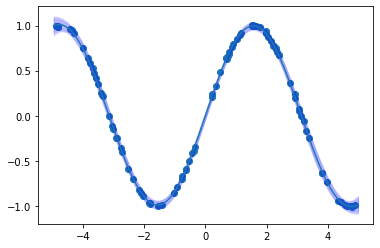

In [11]:
plot_slice(model, Z, Y, dim=0)

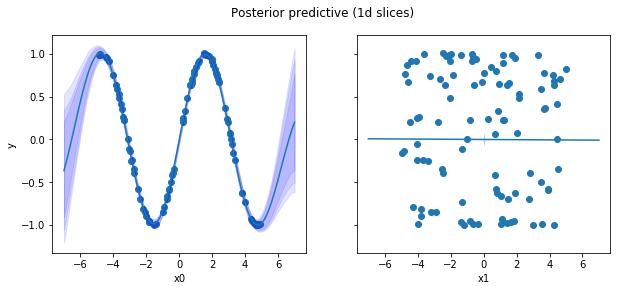

In [12]:
fig, ax = plot_slices(model, Z, Y, x_plot=torch.linspace(-7,7,100).reshape(-1,1), figsize=(10,4))

In [13]:
for name, p in model.named_parameters():
    print(name, p.detach())

layer_in.lognu_mu tensor([-0.6992])
layer_in.lognu_logsig2 tensor([-10.2899])
layer_in.logeta_mu tensor([-0.0698, -5.4912])
layer_in.logeta_logsig2 tensor([-10.3718,  -0.6904])


In [14]:
with torch.no_grad():
    mu = model.layer_in.logeta_mu
    sig2 = model.layer_in.logeta_logsig2.exp()

    mean = torch.exp(mu + sig2/2)
    var = (torch.exp(sig2)-1)*torch.exp(2*mu+sig2)

In [15]:
mean

tensor([0.9326, 0.0053])

In [16]:
var

tensor([2.7228e-05, 1.8268e-05])

Text(0, 0.5, 'horseshoe parameter (for variable selection)')

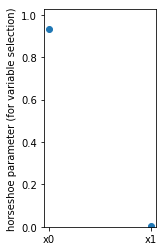

In [17]:
fig, ax = plt.subplots(figsize=(2,4))
ax.errorbar(np.arange(model.dim_in), mean.detach(), yerr=var.detach(), fmt='o')
ax.set_ylim(0,1.1*mean.max())
ax.set_xticks(np.arange(model.dim_in))
ax.set_xticklabels(['x'+str(z) for z in range(dim_in)])
ax.set_ylabel('horseshoe parameter (for variable selection)')

#### GPy for comparison

In [29]:
import GPy
kernel = GPy.kern.RBF(input_dim=2, variance=1., lengthscale=1.)

In [30]:
m = GPy.models.GPRegression(Z,Y,kernel)

m.Gaussian_noise.variance = sig2
m.Gaussian_noise.fix()
m.optimize_restarts(num_restarts = 10, verbose=False)

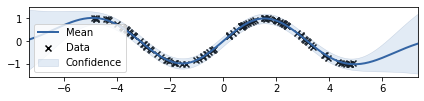

In [41]:
slices = [0]
figure = GPy.plotting.plotting_library().figure(3, 1)
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1,y)], row=(i+1), plot_data=True)
#GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing')

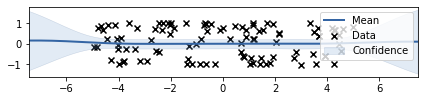

In [42]:
slices = [0]
figure = GPy.plotting.plotting_library().figure(3, 1)
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(0,y)], row=(i+1), plot_data=True)
#GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing_vertical')